In [23]:
import numpy as np
import os
import sys
import math
import torch
import time
import re
import cv2
from pathlib import Path
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
from torchvision import transforms
# from icecream import ic
from itertools import repeat
import random
# import sympy as sy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from copy import deepcopy
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# 随机森林

## 集成算法

## 随机森林分类

In [2]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
wine.data.shape

(178, 13)

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [11]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(xtrain, ytrain)
rfc = rfc.fit(xtrain, ytrain)
score_c = clf.score(xtest, ytest)
score_r = rfc.score(xtest, ytest)
score_c, score_r

(0.9259259259259259, 0.9814814814814815)

## 交叉验证

In [12]:
from sklearn.model_selection import cross_val_score

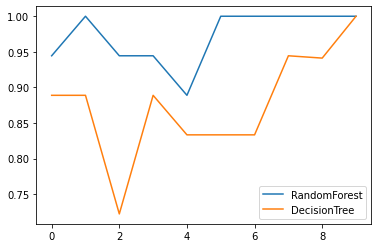

In [22]:
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)
clf = DecisionTreeClassifier(max_depth=3
)
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)
plt.plot(rfc_s, label="RandomForest")
plt.plot(clf_s, label="DecisionTree")
plt.legend()
plt.show()

## 随机森林回归

In [26]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [27]:
boston = load_boston()


In [28]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

In [29]:
cross_val_score(regressor, boston.data, boston.target, cv=10, scoring="neg_mean_squared_error")

array([-11.22504076,  -5.3945749 ,  -4.74755867, -22.54699078,
       -12.31243335, -17.18030718,  -6.94019868, -94.14567212,
       -28.541145  , -14.6250416 ])

In [30]:
cross_val_score(regressor, boston.data, boston.target, cv=10)#  R2

array([ 0.67819933,  0.7991313 ,  0.32319436,  0.7701811 ,  0.82532915,
        0.77169254,  0.56622934,  0.36860224, -0.51435561,  0.22466632])

In [31]:
import sklearn

sklearn中所有的模型评估指标

In [33]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

# 用随机森林回归填补缺失值

sklearn.inpute.SimpleImputer

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

In [46]:
0.9999999999999999**10240

0.9999999999988631